# Time and Trends Analysis

Here we use the `created at' date to capture time-based trends and other figures for the paper.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import json
import pickle
import matplotlib.pyplot as plt
import random
import datetime

In [2]:
with open('data/ai_ecosystem_graph_nomerges.pkl', 'rb') as f:
    G = pickle.load(f)

In [3]:
# Print a random node from G
print(G.nodes[random.choice(list(G.nodes()))])

{'likes': 0, 'downloads': 0, 'pipeline_tag': nan, 'library_name': nan, 'createdAt': '2024-12-07T23:43:09.000Z', 'licenses': '[]', 'datasets': '[]', 'languages': '[]'}


/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_23093/2283409891.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis', 10)


Component 1 name: black-forest-labs/FLUX.1-dev
0
Component 2 name: Qwen/Qwen1.5-0.5B
1
Component 3 name: Qwen/Qwen1.5-1.8B
2
Component 4 name: meta-llama/Meta-Llama-3-8B
3
Component 5 name: google/gemma-2b
4
Component 6 name: meta-llama/Llama-3.1-8B
5
Component 7 name: google/gemma-7b
6
Component 8 name: distilbert/distilbert-base-uncased
7
Component 9 name: Qwen/Qwen2.5-7B
8
Component 10 name: stabilityai/stable-diffusion-xl-base-1.0
9


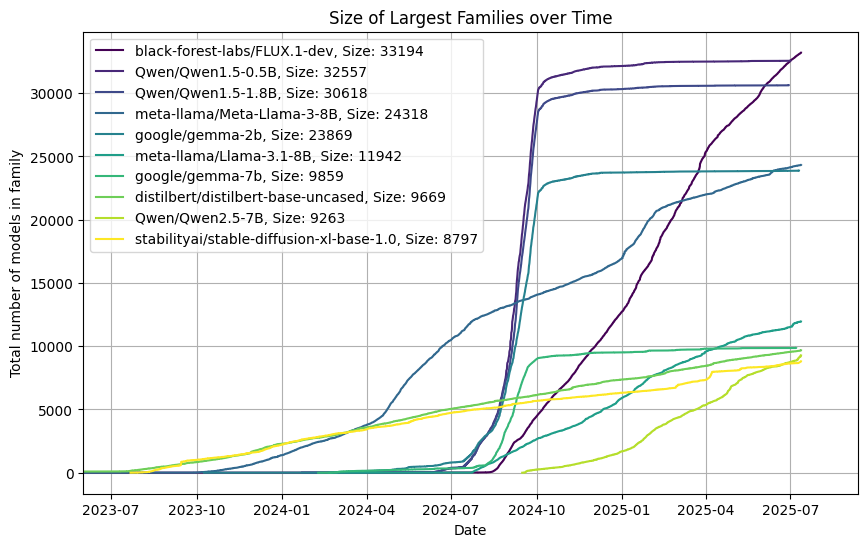

In [4]:
# Get the 10 largest connected components
largest_components = sorted(nx.weakly_connected_components(G), key=len, reverse=True)[:10]

# Prepare to plot
plt.figure(figsize=(10, 6))

# Define a color map
colors = plt.cm.get_cmap('viridis', 10)

# Iterate over each of the largest components
for i, component in enumerate(largest_components):

    # Define the name of the component by following directed edges
    def get_component_name(component):
        for node in component:
            current_node = node
            max_cycles = 20
            for i in range(max_cycles):
                successors = list(G.predecessors(current_node))
                if not successors:
                    return current_node
                current_node = successors[0]
            else:
                print("WEIRD")

    component_name = get_component_name(component)
    print(f"Component {i+1} name: {component_name}")

    print(i)
    # Create a subgraph for the component
    subgraph = G.subgraph(component)    
    
    # Extract "createdAt" dates
    created_at_dates = [datetime.datetime.strptime(G.nodes[node]['createdAt'], '%Y-%m-%dT%H:%M:%S.%fZ') for node in subgraph.nodes if 'createdAt' in G.nodes[node]]
    # Sort dates
    created_at_dates.sort()
    
    # Calculate CDF
    #cdf = np.arange(1, len(created_at_dates) + 1) / len(created_at_dates)
    # Calculate the total number of nodes in the component
    cdf = np.arange(1, len(created_at_dates) + 1) 
    
    
    # Get the size of the component
    component_size = len(component)
    
    # Plot CDF
    plt.step(created_at_dates, cdf, where='post', color=colors(i), label=f"{component_name}, Size: {component_size}")

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Total number of models in family')
plt.title('Size of Largest Families over Time')
plt.legend()
plt.grid(True)

#plt.yticks([0, 10000, 20000, 30000], ["0", "10K", "20K", "30K"])
#plt.yscale('log')

plt.xlim(left=pd.Timestamp('2023-06-01'))

#plt.savefig('figures/family_size_over_time_finetune.png', bbox_inches = 'tight', dpi = 300)
plt.show()

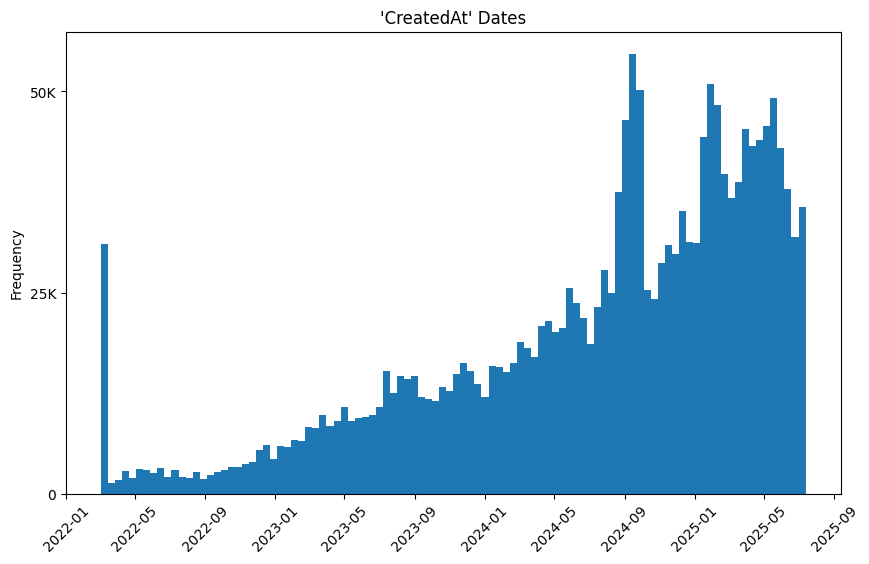

In [5]:
created_at_series = [datetime.datetime.strptime(G.nodes[node]['createdAt'], '%Y-%m-%dT%H:%M:%S.%fZ') for node in G.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(created_at_series, bins=100)
#plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x).year))
#plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1000)}K' if y in [0, 50000, 100000] else ''))
plt.yticks([0, 25000, 50000], ['0', '25K', '50K'])
plt.xticks(rotation=45)

plt.title("\'CreatedAt\' Dates")
#plt.xlabel("Date")
plt.ylabel("Frequency")
#plt.grid(True)
#plt.savefig('figures/created_at_over_time_aug9.png', dpi=300, bbox_inches='tight')
plt.show()

## Check that finetunes are the dominant asexual progenators

In [6]:
#with open('data/ai_ecosystem_graph_nomerges.pkl', 'rb') as f:
#    G = pickle.load(f)

In [7]:
finetune_dates = []
finetune_further_children = 0
merge_dates = []
merge_further_children = 0
quantization_dates = []
quantization_further_children = 0
adapter_dates = []
adapter_further_children = 0

for i, j, data in G.edges(data=True):
    created_at_j = datetime.datetime.strptime(G.nodes[j]['createdAt'], '%Y-%m-%dT%H:%M:%S.%fZ')
    edge_type = data.get('edge_type', '')
    if edge_type == 'finetune':
        finetune_dates.append(created_at_j)
        if len(list(G.successors(j))) > 0:
            finetune_further_children += 1
    elif edge_type == 'merge':
        merge_dates.append(created_at_j)
        if len(list(G.successors(j))) > 0:
            merge_further_children += 1
    elif edge_type == 'quantized':
        quantization_dates.append(created_at_j)
        if len(list(G.successors(j))) > 0:
            quantization_further_children += 1
    elif edge_type == 'adapter':
        adapter_dates.append(created_at_j)
        if len(list(G.successors(j))) > 0:
            adapter_further_children += 1


In [8]:
print("Number of finetune edges: ", len(finetune_dates))
#print("Number of merge edges: ", len(merge_dates))
print("Number of quantization edges: ", len(quantization_dates))
print("Number of adapter edges: ", len(adapter_dates))

print("Number of further children after a finetune: ", finetune_further_children)
#print("Number of further children after a merge: ", merge_further_children)
print("Number of further children after a quantization: ", quantization_further_children)
print("Number of further children after an adapter: ", adapter_further_children)

Number of finetune edges:  189391
Number of quantization edges:  101921
Number of adapter edges:  241417
Number of further children after a finetune:  15047
Number of further children after a quantization:  970
Number of further children after an adapter:  458
